# Import Packages

In [49]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Define data

    1 - define x_train and y_train with size (7,1)
    2 - define test set

In [50]:
x_train = np.array([3, 5, 10, 0.2, 8, 7, 8])
y_train = np.array([75, 82, 93, 61, 78, 65, 97])

# x_train is of size (7,), we add an axis to the end of it using np.newaxis
x_train = x_train[:, np.newaxis]
y_train = y_train[:, np.newaxis]

x_test = np.array([[8]])

nUm_training_samples = x_train.shape[0]

print('Number of training samples = '+str(nUm_training_samples))
print('Number of features = '+str(x_train.shape[1]))

Number of training samples = 7
Number of features = 1


# Normalize Data
    1 - Normalize training data
    2 - use plt.scatter to visualize data and normalized data
    3 - keep the min value and max value
    4 - normalize test data using mean value and max value aquired in last step

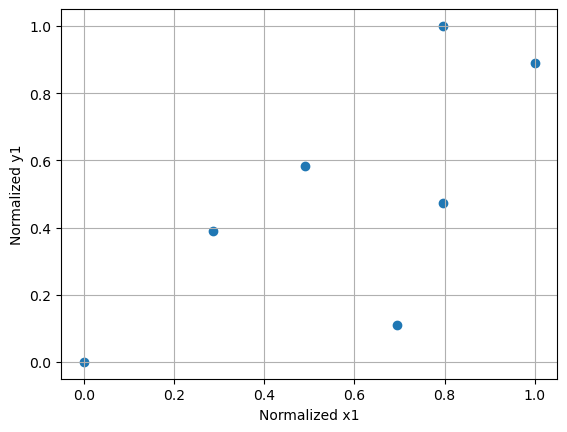

In [51]:
min_value_x, max_value_x = np.min(x_train), np.max(x_train)
min_value_y, max_value_y = np.min(y_train), np.max(y_train)

# Normalize x_train and y_train
x_train = (x_train - min_value_x)/(max_value_x-min_value_x)
y_train = (y_train - min_value_y)/(max_value_y-min_value_y)

# Normalize x_test
x_test = (x_test - min_value_x)/(max_value_x-min_value_x)

# Visualize using scatter plot
plt.figure()
plt.scatter(x_train, y_train)
plt.xlabel('Normalized x1')
plt.ylabel('Normalized y1')
plt.grid()


# Calcuate loss for each w value

### Method 1: Using for loop
#### Find loss for each value of w

In [62]:
loss_absolute_error_list = []
loss_squared_error_list = []
w_vector = np.arange(-5,5,0.01)

for w in list(w_vector):
    y_hat = w*x_train
    absolute_error = np.abs(y_train - y_hat)
    squared_error = (y_train - y_hat)**2
    
    loss_absolute_error_list.append( 0.5*np.sum(absolute_error, axis = 0))
    loss_squared_error_list.append( 0.5*np.sum(squared_error, axis = 0))

#### 1 - Plot the loss value
#### 2 - Find optimum w


Minimum value of absolute error is 0.6586734693876974
Minimum value of square error is 0.21223729798797658
Corresponding w is 0.8899999999998744
Corresponding w is 0.8299999999998757


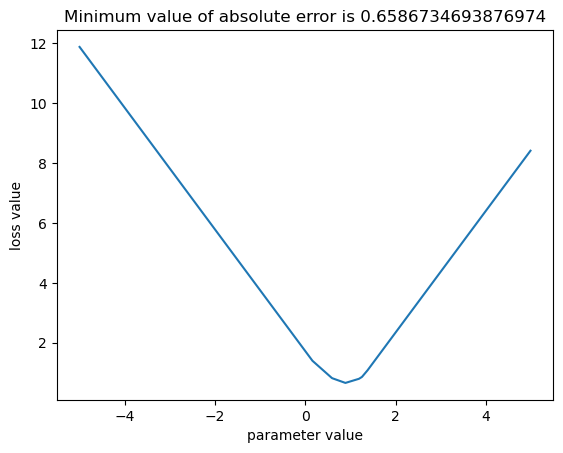

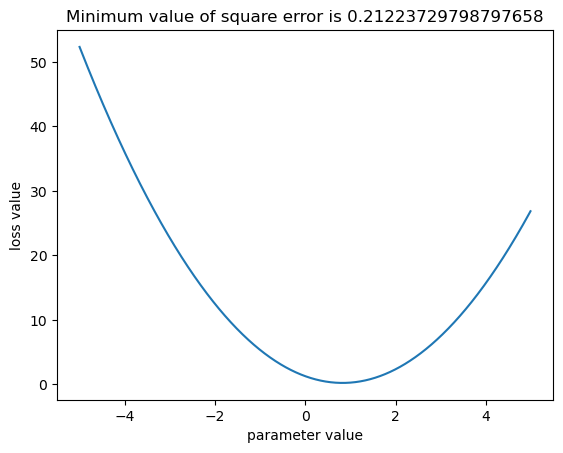

In [63]:
loss_absolute_error_list = np.array(loss_absolute_error_list)
loss_squared_error_list = np.array(loss_squared_error_list)

plt.figure()
plt.plot(w_vector, loss_absolute_error_list)
plt.ylabel('loss value')
plt.xlabel('parameter value')
plt.title("Minimum value of absolute error is " + str(np.min(loss_absolute_error_list)))

plt.figure()
plt.plot(w_vector, loss_squared_error_list)
plt.ylabel('loss value')
plt.xlabel('parameter value')
plt.title("Minimum value of square error is " + str(np.min(loss_squared_error_list)))

print("Minimum value of absolute error is " + str(np.min(loss_absolute_error_list)))
print("Minimum value of square error is " + str(np.min(loss_squared_error_list)))

w_optm_abs_err = w_vector[np.argmin(loss_absolute_error_list)]
w_optm_square_err = w_vector[np.argmin(loss_squared_error_list)]

print("Corresponding w is " + str(w_optm_abs_err))
print("Corresponding w is " + str(w_optm_square_err))

(80,)


### Method 2: Using Matrix manipulation
### 1 - Squared Error
### 2 - Absolute Error

    L = 0.5* sum_i |wx-y|

    L = 0.5* sum_i (wx-y)^2

In [76]:
# define weight vector
w = np.arange(-5,5,0.01)
# add axis to weight vector
w_vector = w[np.newaxis, :] # 1x100
y_hat = np.matmul(X_train, w_vector)
# Calculate loss
loss_absolute_error_list = 0.5*np.sum(np.abs(Y_train-y_hat), axis=0)
loss_squared_error_list = 0.5*np.sum((Y_train-y_hat)**2, axis=0)

In [80]:
loss_absolute_error_list.shape

(1000,)

Minimum value of absolute error is 0.6586734693876974
Minimum value of square error is 0.21223729798797658
Corresponding w is 0.8899999999998744
Corresponding w is 0.8299999999998757


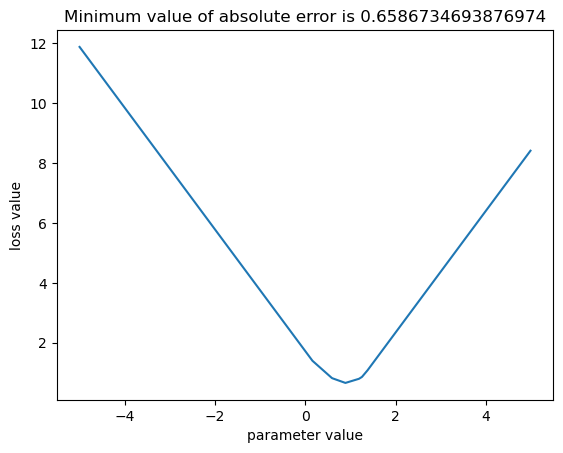

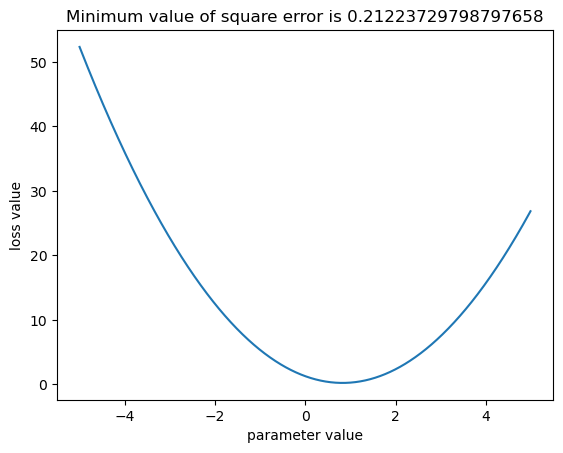

In [82]:
loss_absolute_error_list = np.array(loss_absolute_error_list)
loss_squared_error_list = np.array(loss_squared_error_list)

plt.figure()
plt.plot(np.squeeze(w_vector), loss_absolute_error_list)
plt.ylabel('loss value')
plt.xlabel('parameter value')
plt.title("Minimum value of absolute error is " + str(np.min(loss_absolute_error_list)))

plt.figure()
plt.plot(np.squeeze(w_vector), loss_squared_error_list)
plt.ylabel('loss value')
plt.xlabel('parameter value')
plt.title("Minimum value of square error is " + str(np.min(loss_squared_error_list)))

print("Minimum value of absolute error is " + str(np.min(loss_absolute_error_list)))
print("Minimum value of square error is " + str(np.min(loss_squared_error_list)))

w_vector = np.squeeze(w_vector)
w_optm_abs_err = w_vector[np.argmin(np.squeeze(loss_absolute_error_list))]
w_optm_square_err = w_vector[np.argmin(np.squeeze(loss_squared_error_list))]

print("Corresponding w is " + str(w_optm_abs_err))
print("Corresponding w is " + str(w_optm_square_err))



# Predict test values

In [83]:

y_hat_test = w_optm_abs_err * x_test

y_hat_unnormalized = y_hat_test*(max_value_y - min_value_y) + min_value_y

print('predicted value = '+str(y_hat_unnormalized))

predicted value = [[86.50122449]]


# Plot results

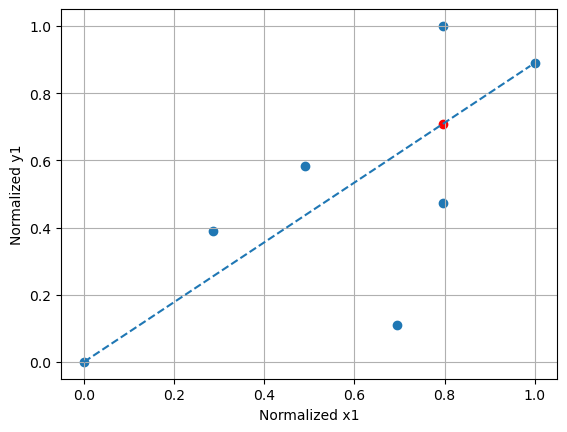

In [92]:
# Visualize using scatter plot
x = np.arange(0,1,0.01)
y = w_optm_abs_err * x
plt.figure()
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_hat_test, c='r')
plt.plot(x,y,'--')
plt.xlabel('Normalized x1')
plt.ylabel('Normalized y1')
plt.grid()

In [ ]:
_